In [1]:
#!pip install matplotlib==3.4
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Load Data

In [5]:
### Paths ###
base_path = "/content/drive/MyDrive/PSO_execs/FilteredDataSets/"
fitness_path = f"{base_path}/fitness.npy"

In [6]:
fitness = np.load(fitness_path, allow_pickle=True)[()]

# Plotagem

## Parametros

In [46]:
limits                = [(9,15), (10,23), (6,19), (15,29)]
figsize               = (18,4)
approach_1_label      = "PSO Base"
approach_2_label      = "Inércia Dinâmica"
xlabel                = "Makespan"
ylabel                = "Frequência"

## Execuções

In [ ]:
#plot_fitness_analise_by_num(p_num=1, with_legend=True, save=False)
#plot_fitness_analise_by_num(p_num=2, with_legend=True, save=False)
#plot_fitness_analise_by_num(p_num=3, with_legend=True, save=False)
plot_fitness_analise_by_num(p_num=4, with_legend=True, save=False, format="jpg")

# Função de Plot

Docs: [MathTex](https://matplotlib.org/stable/tutorials/text/mathtext.html)


In [42]:
def plot_fitness_analise_by_num(p_num, with_legend, save, format):
  fig = plt.figure(figsize=figsize)
  ax = fig.subplots(nrows=1, ncols=3)
  fig.suptitle(f"Problema {p_num}", fontsize=20)
  plt.subplots_adjust(top=0.85)

  lim   = limits[p_num-1]
  sizes = [50,70,90]
  cofs  = [3,5,6]

  ######################################
  for i in range(len(sizes)):
    ft1 = fitness[f"problem_{p_num}"][f"coef_{cofs[i]}"][f"approach_{1}"]
    ft2 = fitness[f"problem_{p_num}"][f"coef_{cofs[i]}"][f"approach_{2}"]
    ft1u, ft1c = np.unique(ft1, return_counts=True)
    ft2u, ft2c = np.unique(ft2, return_counts=True)
    frec1 = dict(zip(ft1u, ft1c))
    frec2 = dict(zip(ft2u, ft2c))

    label1 = '\n'.join((
      r'%s'                   % (approach_1_label),
      r'$\overline{x}=%.2f$'  % (np.average(ft1)),
      r'$\sigma=%.2f$'        % (np.std(ft1)),
      r'')
    )

    label2 = '\n'.join((
      r'%s'                   % (approach_2_label),
      r'$\overline{x}=%.2f$'  % (np.average(ft2)),
      r'$\sigma=%.2f$'        % (np.std(ft2)))
    )
  
    labels = np.unique(np.concatenate((ft1,ft2)))
    pop1 = [(frec1[x] if x in frec1 else 0) for x in labels]
    pop2 = [(frec2[x] if x in frec2 else 0) for x in labels]
    X_axis = np.arange(len(labels))
    ax[i].bar(X_axis-0.2, pop1, 0.4, label=label1)
    ax[i].bar(X_axis+0.2, pop2, 0.4, label=label2)
    ax[i].set_xticks(X_axis)
    ax[i].set_xticklabels(labels)
    ax[i].set_xlabel(xlabel)
    ax[i].set_ylabel(ylabel)
    ax[i].title.set_text(f"{sizes[i]}x{sizes[i]}")
    if with_legend:
      ax[i].legend(fontsize=10, loc='upper right')
  if save:
    plt.savefig(f"problem_{p_num}.{format}")
  ######################################
  plt.show()
####

#Teste Estatisticas

In [ ]:
ft1 = fitness[f"problem_{4}"][f"coef_{6}"][f"approach_{1}"]
ft2 = fitness[f"problem_{4}"][f"coef_{6}"][f"approach_{2}"]
get_statistics(ft1)
#get_statistics(ft2)

In [ ]:
def get_statistics(fit):
  print(f"Média .........................=> {np.average(fit)}")
  print(f"Média Aritmética ..............=> {np.mean(fit)}")
  print(f"Mediana .......................=> {np.median(fit)}")
  print(f"Desvio Padrão .................=> {np.std(fit)}")
  print(f"Variância .....................=> {np.var(fit)}")
  print(f"Mínimo ........................=> {np.min(fit)}")
  print(f"Máximo ........................=> {np.max(fit)}")
  print(f"Valores Únicos ................=> {np.unique(fit)}")
  print(f"Quantidade de Valores Únicos ..=> {len(np.unique(fit))}")

# :: Archived ::

#Plot no formato antigo

##Parametros

In [ ]:
limits_p1             = np.arange(9,15)
limits_p2             = np.arange(10,23)
limits_p3             = np.arange(6,19)
limits_p4             = np.arange(15,29)
limits                = [limits_p1, limits_p2, limits_p3, limits_p4]
figsize               = (18,4)
label_back            = "PSO Base"
label_front           = "Inércia Dinâmica"
largura_bar_back      = 1.0
largura_bar_front     = 0.5
edgecolor_front       = "black"
color_back            = "red"
color_front           = "blue"
alpha_back            = 1
alpha_front           = 0.7


#plot_fitness_analise()
#plot_fitness_analise_problema1()
#plot_fitness_analise_by_num(4)

##Funções

### Com legendas

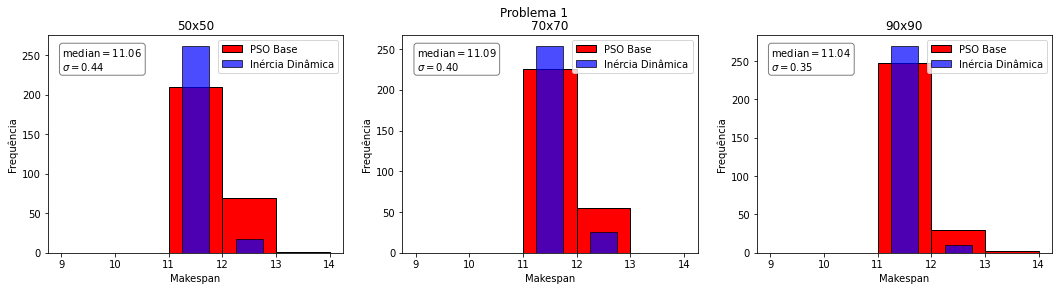

In [12]:
Formato antigo com legendas
def plot_fitness_analise_by_num2(p_num):
  fig = plt.figure(figsize=figsize)
  ax = fig.subplots(nrows=1, ncols=3)
  fig.suptitle(f"Problema {p_num}")

  lim=limits[p_num-1]
  sizes = [50,70,90]
  cofs  = [3,5,6]

  ######################################
  for i in range(len(sizes)):
    ft1 = fitness[f"problem_{p_num}"][f"coef_{cofs[i]}"][f"approach_{1}"]
    ft2 = fitness[f"problem_{p_num}"][f"coef_{cofs[i]}"][f"approach_{2}"]
    mft1 = np.round(np.average(ft1), 2)
    mft2 = np.round(np.average(ft2), 2)
    dvpft1 = np.round(np.std(ft1), 2)
    dvpft2 = np.round(np.std(ft2), 2)
    #legs = [f"m = {mft1}", f"m = {mft2}", f"σ = {dvpft1}", f"σ = {dvpft2}"]
    textstr = '\n'.join((
      r'$\mathrm{median}=%.2f$' % (mft2, ),
      r'$\sigma=%.2f$' % (dvpft1, ))
    )
    legs = [f"m = {mft1}", f"m = {mft2}"]
    ax[i].title.set_text(f"{sizes[i]}x{sizes[i]}")
    ax[i].hist(ft1, bins=lim, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  edgecolor=edgecolor_front)
    ax[i].hist(ft2, bins=lim, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, edgecolor=edgecolor_front)
    ax[i].set_xlabel('Makespan')
    ax[i].set_ylabel('Frequência')
    ax[i].legend([label_back, label_front], loc='upper right')
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax[i].text(0.05, 0.95, textstr, transform=ax[i].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
  ######################################
  plt.show()
plot_fitness_analise_by_num2(1)

### Por Numero

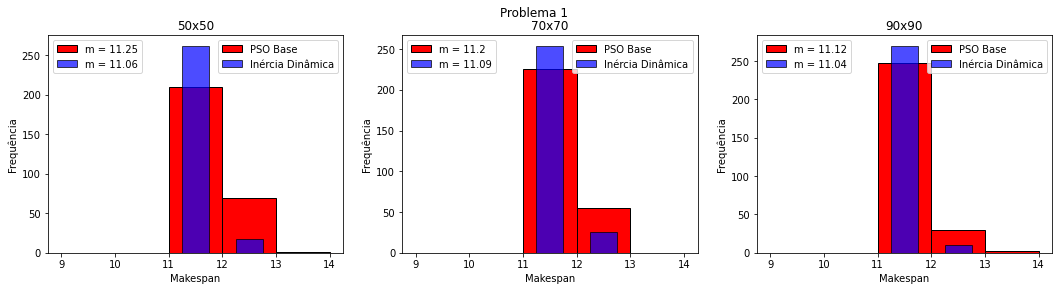

In [11]:
#Formato antigo por numero
def plot_fitness_analise_by_num(p_num):
  fig = plt.figure(figsize=figsize)
  ax = fig.subplots(nrows=1, ncols=3)
  fig.suptitle(f"Problema {p_num}")

  lim=limits[p_num-1]
  sizes = [50,70,90]
  cofs  = [3,5,6]

  ######################################
  for i in range(len(sizes)):
    ft1 = fitness[f"problem_{p_num}"][f"coef_{cofs[i]}"][f"approach_{1}"]
    ft2 = fitness[f"problem_{p_num}"][f"coef_{cofs[i]}"][f"approach_{2}"]
    mft1 = np.round(np.average(ft1), 2)
    mft2 = np.round(np.average(ft2), 2)
    dvpft1 = np.round(np.std(ft1), 2)
    dvpft2 = np.round(np.std(ft2), 2)
    #legs = [f"m = {mft1}", f"m = {mft2}", f"σ = {dvpft1}", f"σ = {dvpft2}"]
    legs = [f"m = {mft1}", f"m = {mft2}"]
    ax[i].title.set_text(f"{sizes[i]}x{sizes[i]}")
    ax[i].hist(ft1, bins=lim, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  edgecolor=edgecolor_front)
    ax[i].hist(ft2, bins=lim, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, edgecolor=edgecolor_front)
    ax[i].set_xlabel('Makespan')
    ax[i].set_ylabel('Frequência')
    leg_med = ax[i].legend(legs, loc='upper left')
    ax[i].legend([label_back, label_front], loc='upper right')
    ax[i].add_artist(leg_med)
  ######################################
  plt.show()
plot_fitness_analise_by_num(1)

### Todos os problemas

In [17]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# Formato antigo | todos os problemas
def plot_fitness_analise():
  fig = plt.figure(figsize=figsize)
  ax = fig.subplots(nrows=1, ncols=3)

  fig.suptitle("Problema 1")
  ######################################
  ax[0].title.set_text("50x50")
  ax[0].hist(ft_p1_c3_a1, bins=limits_p1, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  label=label_back)
  ax[0].hist(ft_p1_c3_a2, bins=limits_p1, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, label=label_front, edgecolor=edgecolor_front)
  ax[0].set_xlabel('Makespan')
  ax[0].set_ylabel('Frequência')
  ax[0].legend(loc='upper right')

  ax[1].title.set_text("70x70")
  ax[1].hist(ft_p1_c5_a1, bins=limits_p1, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  label=label_back)
  ax[1].hist(ft_p1_c5_a2, bins=limits_p1, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, label=label_front, edgecolor=edgecolor_front)
  ax[1].set_xlabel('Makespan')
  ax[1].set_ylabel('Frequência')
  ax[1].legend(loc='upper right')

  ax[2].title.set_text("90x90")
  ax[2].hist(ft_p1_c6_a1, bins=limits_p1, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  label=label_back)
  ax[2].hist(ft_p1_c6_a2, bins=limits_p1, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, label=label_front, edgecolor=edgecolor_front)
  ax[2].set_xlabel('Makespan')
  ax[2].set_ylabel('Frequência')
  ax[2].legend(loc='upper right')
  ######################################
  plt.show()
  ######################################


  fig = plt.figure(figsize=figsize)
  ax = fig.subplots(nrows=1, ncols=3)
  fig.suptitle("Problema 2")
  ######################################
  ax[0].title.set_text("50x50")
  ax[0].hist(ft_p2_c3_a1, bins=limits_p2, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  label=label_back)
  ax[0].hist(ft_p2_c3_a2, bins=limits_p2, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, label=label_front, edgecolor=edgecolor_front)
  ax[0].set_xlabel('Makespan')
  ax[0].set_ylabel('Frequência')
  ax[0].legend(loc='upper right')

  ax[1].title.set_text("70x70")
  ax[1].hist(ft_p2_c5_a1, bins=limits_p2, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  label=label_back)
  ax[1].hist(ft_p2_c5_a2, bins=limits_p2, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, label=label_front, edgecolor=edgecolor_front)
  ax[1].legend(loc='upper right')

  ax[2].title.set_text("90x90")
  ax[2].hist(ft_p2_c6_a1, bins=limits_p2, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  label=label_back)
  ax[2].hist(ft_p2_c6_a2, bins=limits_p2, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, label=label_front, edgecolor=edgecolor_front)
  ax[2].set_xlabel('Makespan')
  ax[2].set_ylabel('Frequência')
  ax[2].legend(loc='upper right')
  ######################################
  plt.show()
  ######################################

  
  fig = plt.figure(figsize=figsize)
  ax = fig.subplots(nrows=1, ncols=3)
  fig.suptitle("Problema 3")
  ######################################
  ax[0].title.set_text("50x50")
  ax[0].hist(ft_p3_c3_a1, bins=limits_p3, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  label=label_back)
  ax[0].hist(ft_p3_c3_a2, bins=limits_p3, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, label=label_front, edgecolor=edgecolor_front)
  ax[0].set_xlabel('Makespan')
  ax[0].set_ylabel('Frequência')
  ax[0].legend(loc='upper right')

  ax[1].title.set_text("70x70")
  ax[1].hist(ft_p3_c5_a1, bins=limits_p3, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  label=label_back)
  ax[1].hist(ft_p3_c5_a2, bins=limits_p3, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, label=label_front, edgecolor=edgecolor_front)
  ax[1].set_xlabel('Makespan')
  ax[1].set_ylabel('Frequência')
  ax[1].legend(loc='upper right')

  ax[2].title.set_text("90x90")
  ax[2].hist(ft_p3_c6_a1, bins=limits_p3, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  label=label_back)
  ax[2].hist(ft_p3_c6_a2, bins=limits_p3, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, label=label_front, edgecolor=edgecolor_front)
  ax[2].set_xlabel('Makespan')
  ax[2].set_ylabel('Frequência')
  ax[2].legend(loc='upper right')
  ######################################
  plt.show()
  ######################################


  fig = plt.figure(figsize=figsize)
  ax = fig.subplots(nrows=1, ncols=3)
  fig.suptitle("Problema 4")
  ######################################
  ax[0].title.set_text("50x50")
  ax[0].hist(ft_p4_c3_a1, bins=limits_p4, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  label=label_back)
  ax[0].hist(ft_p4_c3_a2, bins=limits_p4, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, label=label_front, edgecolor=edgecolor_front)
  ax[0].set_xlabel('Makespan')
  ax[0].set_ylabel('Frequência')
  ax[0].legend(loc='upper right')

  ax[1].title.set_text("70x70")
  ax[1].hist(ft_p4_c5_a1, bins=limits_p4, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  label=label_back)
  ax[1].hist(ft_p4_c5_a2, bins=limits_p4, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, label=label_front, edgecolor=edgecolor_front)
  ax[1].set_xlabel('Makespan')
  ax[1].set_ylabel('Frequência')
  ax[1].legend(loc='upper right')

  ax[2].title.set_text("90x90")
  ax[2].hist(ft_p4_c6_a1, bins=limits_p4, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  label=label_back)
  ax[2].hist(ft_p4_c6_a2, bins=limits_p4, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, label=label_front, edgecolor=edgecolor_front)
  ax[2].set_xlabel('Makespan')
  ax[2].set_ylabel('Frequência')
  ax[2].legend(loc='upper right')
  ######################################
  plt.show()

### Problema Unico

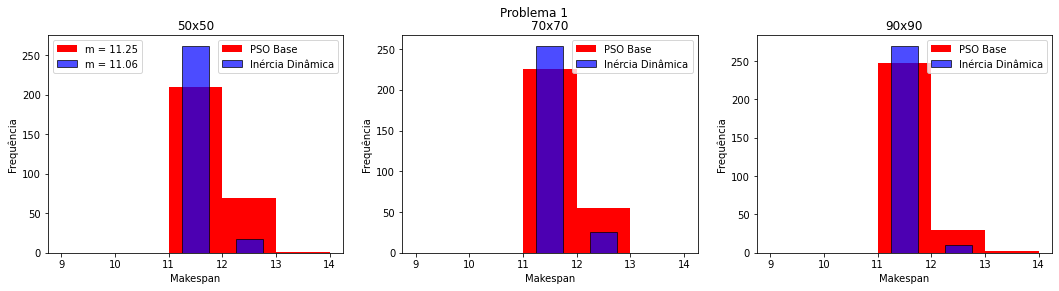

In [20]:
# Formato antigo | problema unico
def plot_fitness_analise_problema1():
  fig = plt.figure(figsize=figsize)
  ax = fig.subplots(nrows=1, ncols=3)

  fig.suptitle("Problema 1")
  ######################################
  mft_p1_c3_a1 = np.round(sum(ft_p1_c3_a1)/len(ft_p1_c3_a1), 2)
  mft_p1_c3_a2 = np.round(sum(ft_p1_c3_a2)/len(ft_p1_c3_a2), 2)
  ax[0].title.set_text("50x50")
  ax[0].hist(ft_p1_c3_a1, bins=limits_p1, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back)
  ax[0].hist(ft_p1_c3_a2, bins=limits_p1, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, edgecolor=edgecolor_front)
  ax[0].set_xlabel('Makespan')
  ax[0].set_ylabel('Frequência')
  leg1 = ax[0].legend([f"m = {mft_p1_c3_a1}", f"m = {mft_p1_c3_a2}"], loc='upper left')
  ax[0].legend([label_back, label_front], loc='upper right')
  #ax[0].legend(loc='upper right')
  ax[0].add_artist(leg1)

  ax[1].title.set_text("70x70")
  mft_p1_c5_a1 = np.round(sum(ft_p1_c5_a1)/len(ft_p1_c5_a1), 2)
  mft_p1_c5_a2 = np.round(sum(ft_p1_c5_a2)/len(ft_p1_c5_a2), 2)
  ax[1].hist(ft_p1_c5_a1, bins=limits_p1, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  label=label_back, )
  ax[1].hist(ft_p1_c5_a2, bins=limits_p1, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, label=label_front, edgecolor=edgecolor_front)
  ax[1].set_xlabel('Makespan')
  ax[1].set_ylabel('Frequência')
  ax[1].legend(loc='upper right')

  ax[2].title.set_text("90x90")
  ax[2].hist(ft_p1_c6_a1, bins=limits_p1, alpha=alpha_back,  color=color_back,  rwidth=largura_bar_back,  label=label_back)
  ax[2].hist(ft_p1_c6_a2, bins=limits_p1, alpha=alpha_front, color=color_front, rwidth=largura_bar_front, label=label_front, edgecolor=edgecolor_front)
  ax[2].set_xlabel('Makespan')
  ax[2].set_ylabel('Frequência')
  ax[2].legend(loc='upper right')
  ######################################
  plt.show()
plot_fitness_analise_problema1()


##Import and Save Fitness

In [ ]:
#problem_x / coef_x / approach_x
#fitness[f"problem_{}"][f"coef_{}"][f"approach_{}"].append()
fitness = {
"problem_1": {
  "coef_3": {"approach_1": [], "approach_2": []},
  "coef_5": {"approach_1": [],"approach_2": []},
  "coef_6": {"approach_1": [], "approach_2": []}},
"problem_2": {
  "coef_3": {"approach_1": [], "approach_2": []},
  "coef_5": {"approach_1": [],"approach_2": []},
  "coef_6": {"approach_1": [], "approach_2": []}},
"problem_3": {
  "coef_3": {"approach_1": [], "approach_2": []},
  "coef_5": {"approach_1": [],"approach_2": []},
  "coef_6": {"approach_1": [], "approach_2": []}},
"problem_4": {
  "coef_3": {"approach_1": [], "approach_2": []},
  "coef_5": {"approach_1": [],"approach_2": []},
  "coef_6": {"approach_1": [], "approach_2": []}}
}

for e in range(1,15):
  for r in range(1, 21):
    for i in range(1, 5):
      path_base_3 = f"drive/MyDrive/PSO_execs/Kacem/exec{r}/problem{i}/cof{3}"
      ft_3_1 = np.load(f"{path_base_3}/fitness_aprout{1}_exec{e}.npy")
      ft_3_2 = np.load(f"{path_base_3}/fitness_aprout{2}_exec{e}.npy")
      fitness[f"problem_{i}"][f"coef_{3}"][f"approach_{1}"].append(ft_3_1[()])
      fitness[f"problem_{i}"][f"coef_{3}"][f"approach_{2}"].append(ft_3_2[()])

      path_base_5 = f"drive/MyDrive/PSO_execs/Kacem/exec{r}/problem{i}/cof{5}"
      ft_5_1 = np.load(f"{path_base_5}/fitness_aprout{1}_exec{e}.npy")
      ft_5_2 = np.load(f"{path_base_5}/fitness_aprout{2}_exec{e}.npy")
      fitness[f"problem_{i}"][f"coef_{5}"][f"approach_{1}"].append(ft_5_1[()])
      fitness[f"problem_{i}"][f"coef_{5}"][f"approach_{2}"].append(ft_5_2[()])

      path_base_6 = f"drive/MyDrive/PSO_execs/Kacem/exec{r}/problem{i}/cof{6}"
      ft_6_1 = np.load(f"{path_base_6}/fitness_aprout{1}_exec{e}.npy")
      ft_6_2 = np.load(f"{path_base_6}/fitness_aprout{2}_exec{e}.npy")
      fitness[f"problem_{i}"][f"coef_{6}"][f"approach_{1}"].append(ft_6_1[()])
      fitness[f"problem_{i}"][f"coef_{6}"][f"approach_{2}"].append(ft_6_2[()])
    #
  #
#

#ft1 = fitness[f"problem_{1}"][f"coef_{3}"][f"approach_{1}"]
#ft2 = fitness[f"problem_{1}"][f"coef_{3}"][f"approach_{2}"]

np.save("fitness.npy", fitness)

In [ ]:
fitness_min_max = {
    "ft_p1_c3_a1":{"min": min(ft_p1_c3_a1), "max": max(ft_p1_c3_a1)},
    "ft_p1_c3_a2":{"min": min(ft_p1_c3_a2), "max": max(ft_p1_c3_a2)},
    "ft_p1_c5_a1":{"min": min(ft_p1_c5_a1), "max": max(ft_p1_c5_a1)},
    "ft_p1_c5_a2":{"min": min(ft_p1_c5_a2), "max": max(ft_p1_c5_a2)},
    "ft_p1_c6_a1":{"min": min(ft_p1_c6_a1), "max": max(ft_p1_c6_a1)},
    "ft_p1_c6_a2":{"min": min(ft_p1_c6_a2), "max": max(ft_p1_c6_a2)},
    "ft_p2_c3_a1":{"min": min(ft_p2_c3_a1), "max": max(ft_p2_c3_a1)},
    "ft_p2_c3_a2":{"min": min(ft_p2_c3_a2), "max": max(ft_p2_c3_a2)},
    "ft_p2_c5_a1":{"min": min(ft_p2_c5_a1), "max": max(ft_p2_c5_a1)},
    "ft_p2_c5_a2":{"min": min(ft_p2_c5_a2), "max": max(ft_p2_c5_a2)},
    "ft_p2_c6_a1":{"min": min(ft_p2_c6_a1), "max": max(ft_p2_c6_a1)},
    "ft_p2_c6_a2":{"min": min(ft_p2_c6_a2), "max": max(ft_p2_c6_a2)},
    "ft_p3_c3_a1":{"min": min(ft_p3_c3_a1), "max": max(ft_p3_c3_a1)},
    "ft_p3_c3_a2":{"min": min(ft_p3_c3_a2), "max": max(ft_p3_c3_a2)},
    "ft_p3_c5_a1":{"min": min(ft_p3_c5_a1), "max": max(ft_p3_c5_a1)},
    "ft_p3_c5_a2":{"min": min(ft_p3_c5_a2), "max": max(ft_p3_c5_a2)},
    "ft_p3_c6_a1":{"min": min(ft_p3_c6_a1), "max": max(ft_p3_c6_a1)},
    "ft_p3_c6_a2":{"min": min(ft_p3_c6_a2), "max": max(ft_p3_c6_a2)},
    "ft_p4_c3_a1":{"min": min(ft_p4_c3_a1), "max": max(ft_p4_c3_a1)},
    "ft_p4_c3_a2":{"min": min(ft_p4_c3_a2), "max": max(ft_p4_c3_a2)},
    "ft_p4_c5_a1":{"min": min(ft_p4_c5_a1), "max": max(ft_p4_c5_a1)},
    "ft_p4_c5_a2":{"min": min(ft_p4_c5_a2), "max": max(ft_p4_c5_a2)},
    "ft_p4_c6_a1":{"min": min(ft_p4_c6_a1), "max": max(ft_p4_c6_a1)},
    "ft_p4_c6_a2":{"min": min(ft_p4_c6_a2), "max": max(ft_p4_c6_a2)}
}
#np.save("fitness_min_max.npy", fitness_min_max)

In [ ]:
#@title
median_fitness = {
  "problem_1": {
    "coef_3": {"approach_1": [sum(ft_p1_c3_a1)/len(ft_p1_c3_a1)], "approach_2": [sum(ft_p1_c3_a2)/len(ft_p1_c3_a2)]},
    "coef_5": {"approach_1": [sum(ft_p1_c5_a1)/len(ft_p1_c5_a1)], "approach_2": [sum(ft_p1_c5_a2)/len(ft_p1_c5_a2)]},
    "coef_6": {"approach_1": [sum(ft_p1_c6_a1)/len(ft_p1_c6_a1)], "approach_2": [sum(ft_p1_c6_a2)/len(ft_p1_c6_a2)]}
  },
  "problem_2": {
    "coef_3": {"approach_1": [sum(ft_p2_c3_a1)/len(ft_p2_c3_a1)], "approach_2": [sum(ft_p2_c3_a2)/len(ft_p2_c3_a2)]},
    "coef_5": {"approach_1": [sum(ft_p2_c5_a1)/len(ft_p2_c5_a1)], "approach_2": [sum(ft_p2_c5_a2)/len(ft_p2_c5_a2)]},
    "coef_6": {"approach_1": [sum(ft_p2_c6_a1)/len(ft_p2_c6_a1)], "approach_2": [sum(ft_p2_c6_a2)/len(ft_p2_c6_a2)]}
  },
  "problem_3": {
    "coef_3": {"approach_1": [sum(ft_p3_c3_a1)/len(ft_p3_c3_a1)], "approach_2": [sum(ft_p3_c3_a2)/len(ft_p3_c3_a2)]},
    "coef_5": {"approach_1": [sum(ft_p3_c5_a1)/len(ft_p3_c5_a1)], "approach_2": [sum(ft_p3_c5_a2)/len(ft_p3_c5_a2)]},
    "coef_6": {"approach_1": [sum(ft_p3_c6_a1)/len(ft_p3_c6_a1)], "approach_2": [sum(ft_p3_c6_a2)/len(ft_p3_c6_a2)]}
  },
  "problem_4": {
    "coef_3": {"approach_1": [sum(ft_p4_c3_a1)/len(ft_p4_c3_a1)], "approach_2": [sum(ft_p4_c3_a2)/len(ft_p4_c3_a2)]},
    "coef_5": {"approach_1": [sum(ft_p4_c5_a1)/len(ft_p4_c5_a1)], "approach_2": [sum(ft_p4_c5_a2)/len(ft_p4_c5_a2)]},
    "coef_6": {"approach_1": [sum(ft_p4_c6_a1)/len(ft_p4_c6_a1)], "approach_2": [sum(ft_p4_c6_a2)/len(ft_p4_c6_a2)]}
  }
}